In [2]:
from sklearn.linear_model import LinearRegression

import scipy.stats
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#これはサンプルコードなので、ダミーデータの読み込みとします。
df = pd.read_csv('XXX.csv')
df

,TNF-a,A_0004,A_0005,A_0026,A_0041,A_0042,A_0047,A_0051,A_0074,A_0077,...,C_0189,C_0192,C_0193,C_0194,C_0195,C_0196,C_0197,C_0201,C_0205,C_0209
0,100,0.455222,0.790569,1.031564,0.932083,1.174091,0.727097,1.115806,1.163671,1.225002,...,1.029600,1.452224,1.552009,1.006847,0.695798,1.161324,1.265355,1.062597,1.158800,1.201825
1,95,0.188230,0.790569,0.621749,0.391745,0.401945,-0.717466,0.509938,0.303000,0.278722,...,0.504736,0.534881,0.825738,0.427890,0.355277,0.523234,0.584286,0.458463,0.544704,0.221920
2,76,-0.118812,-0.790569,-0.812606,-0.283677,-0.704798,-0.717466,-0.752285,-0.491465,-0.572929,...,-0.830169,-0.805850,-0.658380,-0.838581,-0.832763,-0.795485,0.172060,-0.782360,-0.858946,-1.161476
3,91,1.256198,1.581139,0.768111,0.481801,0.466290,1.786443,0.762383,0.435411,0.278722,...,0.417258,0.393752,-0.453130,0.319335,0.241770,0.395616,0.422980,0.357775,0.369248,0.394844
4,0,-1.280228,-0.790569,-0.812606,-0.778987,-0.679059,-0.717466,-0.752285,-0.725391,-0.710570,...,-0.893940,-0.805850,-0.658380,-0.835360,-1.006808,-0.795485,-0.885390,-0.780950,-0.858946,-1.161476
5,97,1.656687,1.581139,2.114648,2.372983,2.267964,1.786443,2.125585,2.311232,2.343332,...,2.254284,2.016743,2.025664,2.345687,2.209226,2.224807,1.982270,2.337990,2.211537,2.066447
6,89,0.855710,-0.790569,-0.543298,-0.778987,-0.730965,0.004815,-0.752285,-0.661392,-0.710570,...,-0.081363,-0.368348,-0.658380,-0.114883,0.809305,-0.327553,-0.885390,-0.414174,-0.253622,0.279561
7,53,-0.906439,-0.790569,-0.742352,-0.778987,-0.731608,-0.717466,-0.752285,-0.778355,-0.710570,...,-0.711200,-0.805850,-0.658380,-0.722789,-0.704122,-0.795485,-0.885390,-0.719597,-0.692262,-0.296854
8,20,-0.986536,-0.790569,-0.812606,-0.778987,-0.731823,-0.717466,-0.752285,-0.778355,-0.710570,...,-0.814423,-0.805850,-0.658380,-0.769829,-0.760876,-0.795485,-0.885390,-0.746447,-0.787009,-0.665759
9,0,-1.120032,-0.790569,-0.812606,-0.778987,-0.732037,-0.717466,-0.752285,-0.778355,-0.710570,...,-0.874783,-0.805850,-0.658380,-0.818317,-1.006808,-0.795485,-0.885390,-0.773298,-0.833505,-0.879033


In [4]:
df_y = df[['YYY']]
df_x = df[df.columns[df.columns != 'YYY']]

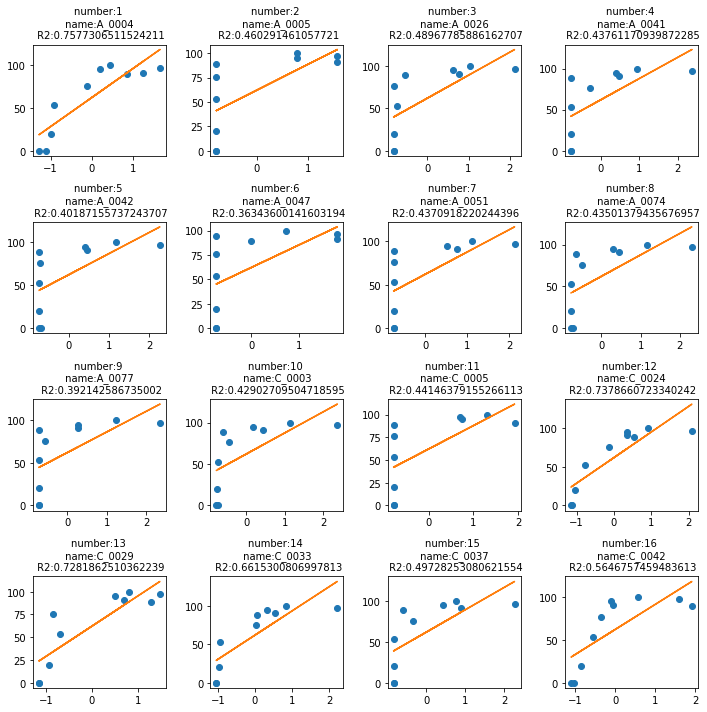

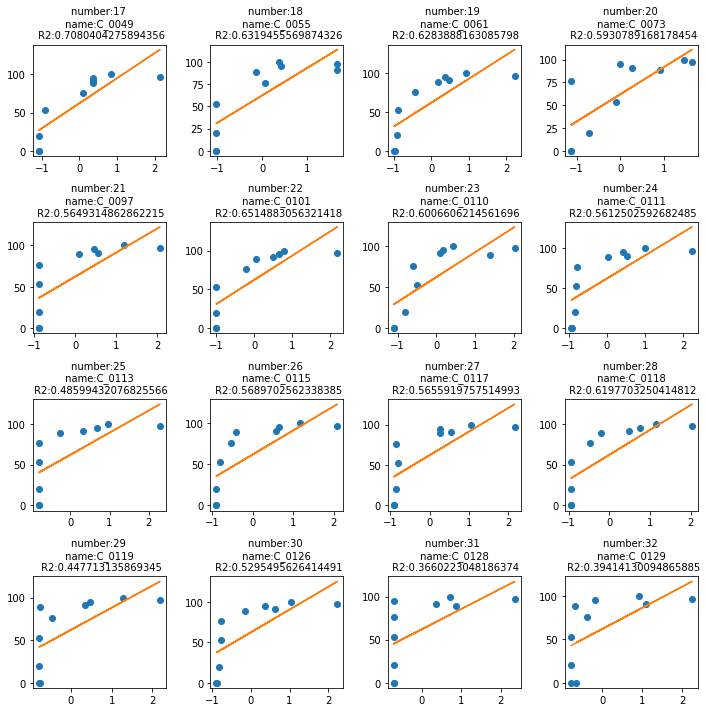

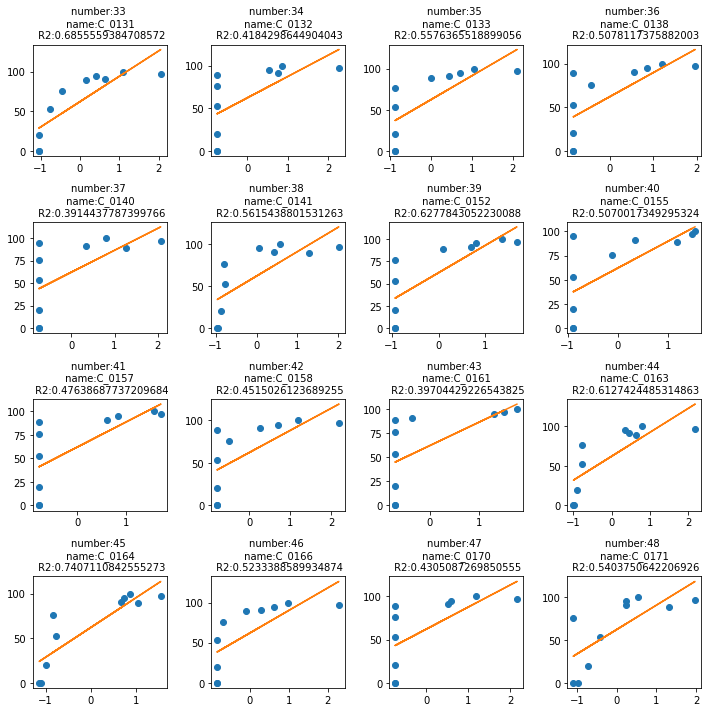

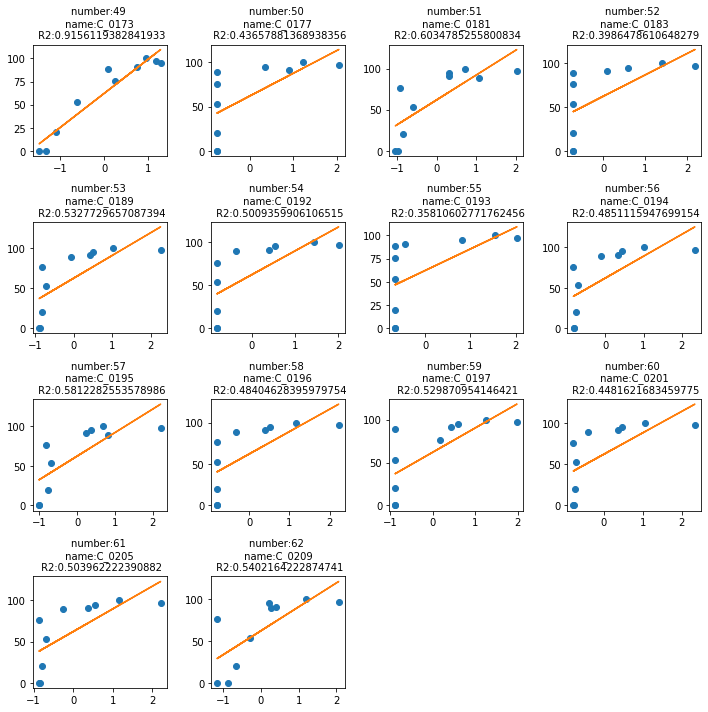

In [20]:
plt.rcParams["figure.figsize"] = (10,10)
plot_point = 0
number = 0
data = [ ('Sample', 1)]
r2_df =  pd.DataFrame(data,columns=['matter_name', 'r_2'])



for x in df_x:
    plot_point += 1
    number += 1
    name = x
    x = df_x[["{}".format(x)]]
    
    model_lr = LinearRegression()
    model_lr.fit(x, df_y)
    
    plt.subplot(4,4,plot_point)
    plt.plot(x, df_y, 'o')
    plt.plot(x, model_lr.predict(x), linestyle="solid")
    plt.title("number:{} \n name:{} \n R2:{}".format(number,name, model_lr.score(x, df_y)),fontsize=10)
    
    r2_df.loc[number] = ["{}".format(name) , model_lr.score(x, df_y)]
    #r2_df = r2_df.append(data)
    
    if plot_point == 16:
        plt.tight_layout()
        plt.show()
        plot_point = 0

plt.tight_layout()
plt.show()
plot_point = 0

In [21]:
r2_df = r2_df.drop([0])
r2_df

,matter_name,r_2
1,A_0004,0.757731
2,A_0005,0.460291
3,A_0026,0.489678
4,A_0041,0.437612
5,A_0042,0.401872
...,...,...
58,C_0196,0.484046
59,C_0197,0.529871
60,C_0201,0.448162
61,C_0205,0.503962


In [23]:
r2_df = r2_df.sort_values('r_2',ascending=False)
r2_df
#print(r2_df.to_string(index=False))

,matter_name,r_2
49,C_0173,0.915612
1,A_0004,0.757731
45,C_0164,0.740711
12,C_0024,0.737866
13,C_0029,0.728186
...,...,...
9,A_0077,0.392143
37,C_0140,0.391444
31,C_0128,0.366022
6,A_0047,0.363436


In [24]:
r2_df.to_csv('name_r2.csv')

## Reference

##### Pythonで基礎から機械学習 「単回帰分析」
###### https://qiita.com/karaage0703/items/701367b6c926552fe505

##### 相関係数
###### https://ja.wikipedia.org/wiki/%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0

##### pandas.DataFrameのforループ処理（イテレーション）
###### https://note.nkmk.me/python-pandas-dataframe-for-iteration/

##### pandas.DataFrameの行・列を指定して削除するdrop
###### https://note.nkmk.me/python-pandas-drop/

##### pandas.DataFrame, Seriesをソートするsort_values, sort_index
###### https://note.nkmk.me/python-pandas-sort-values-sort-index/

##### pandas.DataFrameに列や行を追加（assign, appendなど）
###### https://note.nkmk.me/python-pandas-assign-append/
